In [6]:
import numpy as np
import pandas as pd
from random import shuffle
from scipy import linalg as la
import ssvd
from matplotlib import pyplot as plt
from scipy.special import comb
from itertools import combinations_with_replacement

In [47]:
run ti_datagen.py

pca start
pca done
tsne start
tsne done
pca start
pca done
tsne start
tsne done
pca start
pca done
tsne start
tsne done
pca start
pca done
tsne start
tsne done


<Figure size 432x288 with 0 Axes>

# thinking about the rank of TI data

(696, 500)
Node 0
-Node 1
--Node 3
--Node 4
-Node 2
--Node 5
--Node 6
Num Nodes 7
Tree Matrix
 [[0. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]

id	deltat	pseudotime
0 	 0 	 0
1 	 1 	 1
2 	 1 	 1
3 	 1 	 2
4 	 1 	 2
5 	 1 	 2
6 	 1 	 2


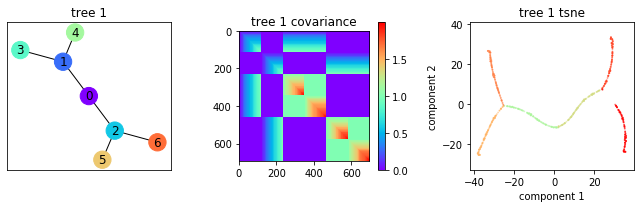

In [48]:
print(tree1.get_data().shape)
fig = plt.figure(figsize=(9,3))
tree1.show_summary('1',method='tsne')

In [50]:
driftL = np.array([
            [1, 1, 0, 0, 0, 0, 0],
            [1, 0, 1, 0, 0, 0, 0],
            [1, 1, 0, 1, 0, 0, 0],
            [1, 1, 0, 0, 1, 0, 0],
            [1, 0, 1, 0, 0, 1, 0],
            [1, 0, 1, 0, 0, 0, 1]
])
driftL = np.repeat(driftL,116,0)
driftL,driftL.shape

(array([[1, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 0, 0, 1]]),
 (696, 7))

In [225]:
vals,vecs = la.eig(tree1.get_covariance())
srt = np.argsort(vals)[::-1]
vals = vals[srt].real
vecs = vecs[:,srt].real

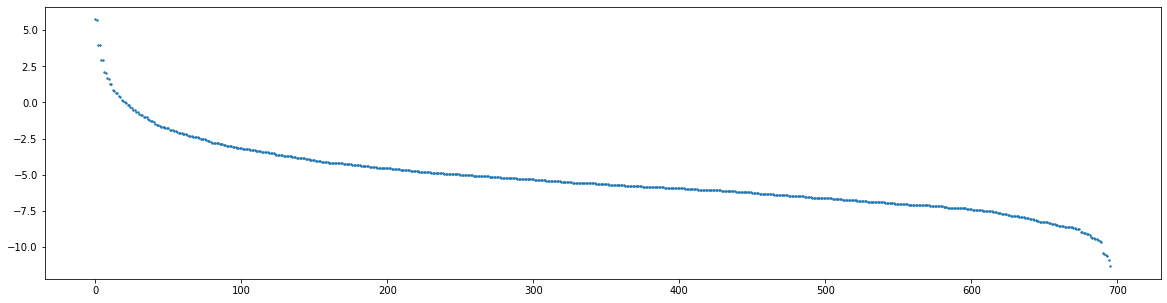

In [226]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(696),np.log(vals),s=2)

In [250]:
tree1.get_data().shape

(696, 500)

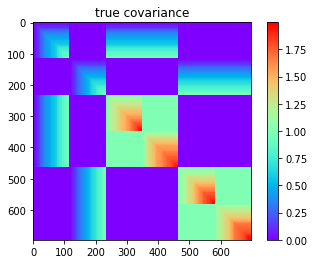

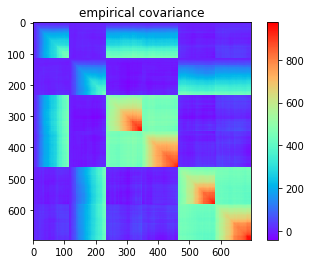

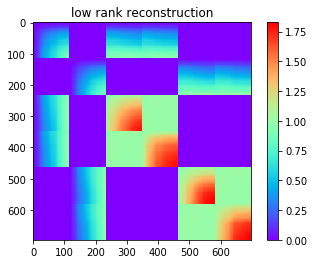

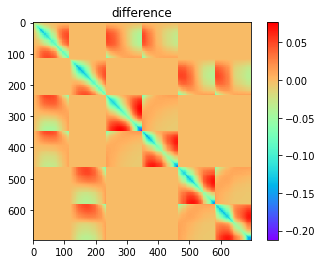

In [249]:
PCS = 6
plt.imshow(tree1.get_covariance())
plt.colorbar()
plt.title('true covariance')
plt.show()

plt.imshow(tree1.get_data()@tree1.get_data().T)
plt.colorbar()
plt.title('empirical covariance')
plt.show()

plt.imshow(vecs[:,:PCS]@np.diag(vals[:PCS])@vecs[:,:PCS].T)
plt.title('low rank reconstruction')
plt.colorbar()
plt.show()

plt.imshow(vecs[:,:PCS]@np.diag(vals[:PCS])@vecs[:,:PCS].T - tree1.get_covariance())
plt.title('difference')
plt.colorbar()
plt.show()

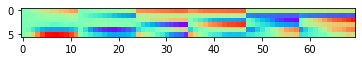

In [176]:
plt.imshow(u[::10,:PCS].T)

 doesn't seem to follow Marchenko-Pastur

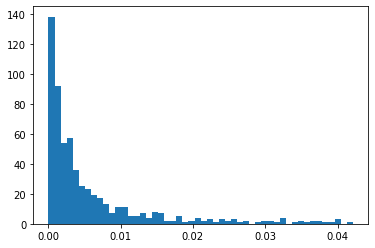

In [248]:
plt.hist((vals)[100:],bins=50)
plt.show()

In [281]:
ls /Users/SuzannaStephensonAdmin/Documents/CAM/Year1/GeneticTrees/SimulatedDatasets.nosync/OldDatasets/

levels2stdev0.001seed0N100dim500deltat1startzerosedges.csv
levels2stdev0.01seed0N100dim500deltat1startzerosedges.csv
levels2stdev0.1seed0N100dim500deltat1startzerosedges.csv
levels2stdev0.25seed0N100dim500deltat1startzerosnodes.csv
levels2stdev0.25seed0N5dim500deltat1startzeros.csv
levels2stdev10seed0N5dim500deltat10startzeros.csv
levels2stdev1seed0N100dim500deltat1startzeros.csv
levels2stdev1seed0N100dim500deltat1startzerosedges.csv
levels2stdev1seed0N100dim500deltat1startzerosedgesnodes.csv
levels2stdev1seed0N100dim500deltat1startzerosnodes.csv
levels2stdev1seed0N1dim500deltat1startzeros.csv
levels2stdev1seed0N5dim500deltat10startzeros.csv
levels2stdev1seed0N5dim500deltat1startzeros.csv
levels2stdev1seed0N5dim500deltat2startzeros.csv
levels2stdev1seed1N100dim500deltat1startones.csv
levels2stdev1seed1N100dim500deltat1startzeros.csv
levels2stdev2seed0N100dim500deltat1startzerosedges.csv
levels2stdev2seed0N5dim500deltat1startzeros.csv
levels2stdev2seed0N5dim500deltat1startzerosedgesnode

In [292]:
node_dataset = pd.read_csv(
    "../SimulatedDatasets.nosync/OldDatasets/levels2stdev0.25seed0N100dim500deltat1startzerosnodes.csv"
)

In [293]:
node_dataset

IsLeaf  Labels      Raw0      Raw1      Raw2      Raw3      Raw4  \
0     False       0  0.067444  0.222298 -0.127127 -0.485282  0.061317   
1     False       0 -0.279283 -0.124138  0.084631 -0.300933  0.061065   
2     False       0  0.044378 -0.391719  0.083665 -0.204343  0.184043   
3     False       0  0.217389  0.108104  0.368524 -0.336852 -0.126791   
4     False       0 -0.042540  0.263364  0.452670 -0.219142 -0.009477   
..      ...     ...       ...       ...       ...       ...       ...   
695    True       6 -0.347431  1.175993  0.895110  2.831224  1.539592   
696    True       6 -0.245924  1.167763  1.318659  2.499360  1.514573   
697    True       6  0.014984  1.270072  1.055075  1.986431  1.422046   
698    True       6 -0.284000  1.028050  1.133051  2.889613  1.726190   
699    True       6  0.216311  0.660283  0.899574  3.020905  1.429570   

         Raw5      Raw6      Raw7  ...    Raw494    Raw495    Raw496  \
0   -0.094872 -0.307721  0.041779  ...  0.266966 -0.222021  0.168325   
1   -0.145980  0.389559 -0.025328  ...  0.188398 -0.127964 -0.038741   
2   -0.020852  0.451137  0.366436  ...  0.002868  0.267658 -0.168136   
3    0.204557  0.240209 -0.092117  ... -0.121156  0.419015 -0.183849   
4    0.094301 -0.479249 -0.116234  ...  0.161161 -0.321637 -0.074209   
..        ...       ...       ...  ...       ...       ...       ...   
695  2.093585  1.185840  3.425953  ...  2.308620 -0.029971 -0.543145   
696  1.911977  1.161211  3.453348  ...  1.832641 -0.391862 -0.053797   
697  1.920035  0.818936  3.004285  ...  1.691030  0.059725  0.060996   
698  1.864412  1.757919  3.140576  ...  2.539130 -0.501614  0.124895   
699  2.257034  1.703189  3.075965  ...  2.437469 -0.487759 -0.334432   

       Raw497    Raw498    Raw499       pca0       pca1      tsne0      tsne1  
0   -0.586796 -0.031142 -0.227367  -0.643577  -2.230197   0.143441 -11.481375  
1    0.177062 -0.251221 -0.122621  -0.550146  -2.219842  -0.113661 -11.283908  
2   -0.160231 -0.085112  0.391732  -0.169415  -2.157131   0.491517 -11.799228  
3   -0.201586  0.200879 -0.365130  -0.649582  -2.373561   0.296858 -13.801986  
4    0.488936  0.432045  0.152240  -0.889061  -2.498750   2.529762 -14.251060  
..        ...       ...       ...        ...        ...        ...        ...  
695  1.289673 -1.489395 -1.127777  18.598744  10.742105  25.440650  27.136500  
696  0.777917 -1.759465 -0.807876  18.749050  10.714321  27.241297  26.008286  
697  0.810651 -1.863477 -1.105177  18.527688  10.360297  24.002686  26.889795  
698  0.965720 -1.757843 -1.559961  19.028959  11.062419  25.272608  24.176329  
699  0.987718 -1.769563 -1.293112  18.041225  10.811917  25.745010  24.455534  

[700 rows x 506 columns]

(-34.07891902180406,
 38.197562021804046,
 -29.07473308340691,
 30.674200083406916)

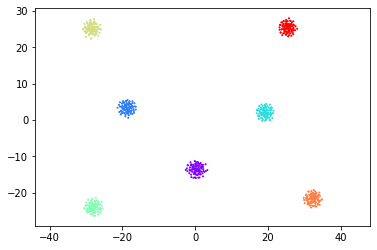

In [294]:
plt.scatter(node_dataset.tsne0,node_dataset.tsne1,s=1,c=node_dataset.Labels)
plt.axis('equal')

In [296]:
node_dataset.columns[2:-4]

Index(['Raw0', 'Raw1', 'Raw2', 'Raw3', 'Raw4', 'Raw5', 'Raw6', 'Raw7', 'Raw8',
       'Raw9',
       ...
       'Raw490', 'Raw491', 'Raw492', 'Raw493', 'Raw494', 'Raw495', 'Raw496',
       'Raw497', 'Raw498', 'Raw499'],
      dtype='object', length=500)

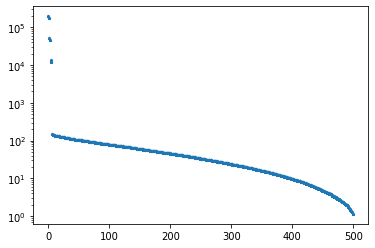

In [305]:
eigs_nodes = la.svd(node_dataset.iloc[:,2:-4],compute_uv=False)**2
plt.semilogy(eigs_nodes,linestyle='',marker='*',markersize=3)

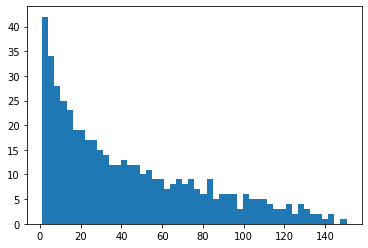

In [308]:
plt.hist(eigs_nodes[6:],bins=50)
plt.show()

# playing with EMBF divergence fit on the basic covariance matrix

In [30]:
L = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/basic_covarianceL.csv").values
F = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/basic_covarianceF.csv").values
pve = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/basic_covariancepve.csv").values
scale = pd.read_csv(f"~/Documents/CAM/Year1/GeneticTrees/basic_covariancescale.csv").values.reshape(-1)

In [31]:
A = np.array([[1,0,1,1,0,0],
             [0,1,0,0,1,1],
             [1,0,2,1,0,0],
             [1,0,1,2,0,0],
             [0,1,0,0,2,1],
             [0,1,0,0,1,2]])

In [32]:
L.shape

(6, 2)

In [33]:
F.shape

(6, 2)

In [34]:
L*scale

array([[ 0.85779015, -0.66556721],
       [ 0.85779015,  0.66556722],
       [ 0.85779015, -0.95431117],
       [ 0.85779015, -0.95431117],
       [ 0.85779015,  0.95431116],
       [ 0.85779015,  0.95431116]])

In [35]:
L

array([[ 0.40824829, -0.31275223],
       [ 0.40824829,  0.31275223],
       [ 0.40824829, -0.44843397],
       [ 0.40824829, -0.44843397],
       [ 0.40824829,  0.44843396],
       [ 0.40824829,  0.44843396]])

In [36]:
F

array([[ 0.30284912, -0.32814987],
       [ 0.30284912,  0.32814986],
       [ 0.45181988, -0.44289822],
       [ 0.45181988, -0.44289822],
       [ 0.45181988,  0.44289822],
       [ 0.45181988,  0.44289822]])

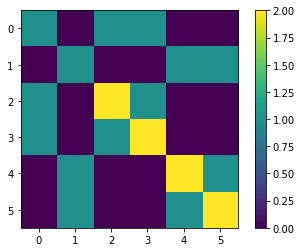

In [37]:
plt.imshow(A)
plt.colorbar()

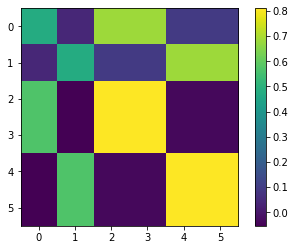

In [45]:
plt.imshow(L*scale@F.T)
plt.colorbar()

# playing with shur independence

In [12]:
plt.set_cmap('coolwarm')

<Figure size 432x288 with 0 Axes>

In [4]:
comb(7,2)+1,comb(6,2)+1

(22.0, 16.0)

In [5]:
np.linalg.matrix_rank(driftL)

6

In [6]:
shur_binary_matrix = np.array([zi*zj for zi,zj in combinations_with_replacement(driftL.T,2)]).T
print(np.linalg.matrix_rank(shur_binary_matrix))

shur_sign_matrix = np.array([(2*zi-1)*(2*zj-1) for zi,zj in combinations_with_replacement(driftL.T,2)]).T
print(np.linalg.matrix_rank(shur_sign_matrix))

6
6


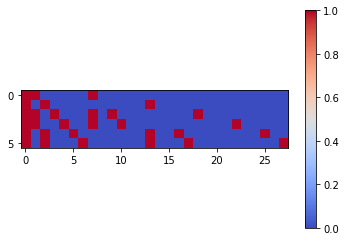

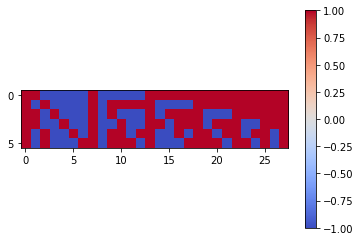

In [13]:
plt.imshow(shur_binary_matrix[::116,])
plt.colorbar()
plt.show()
plt.imshow(shur_sign_matrix[::116,])
plt.colorbar()

In [16]:
shur_sign_matrix.shape,shur_binary_matrix.shape

((696, 28), (696, 28))

In [17]:
#shur independence of random sign vectors
r = 15
n = 4000
A = 2*np.int64(np.random.rand(n,r)>.5)-1
A = np.vstack((np.ones((1,r)),A))
shur_matrix = np.array([coli*colj for coli,colj in combinations_with_replacement(A.T,2)]).T
np.linalg.matrix_rank(shur_matrix),int(comb(r,2))+1

(106, 106)

In [18]:
#shur independence of random binary vectors
r = 20
n = 4000
A = np.int64(np.random.rand(n,r)>.5)
A = np.vstack((np.ones((1,r)),A))
shur_matrix = np.array([coli*colj for coli,colj in combinations_with_replacement(A.T,2)]).T
np.linalg.matrix_rank(shur_matrix),int(comb(r,2))+1

(210, 191)

# playing with least squares

<Figure size 432x288 with 0 Axes>

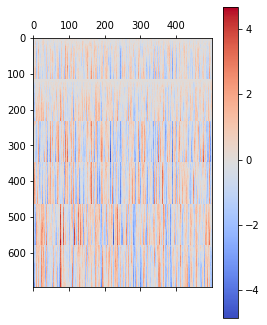

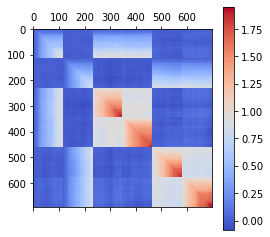

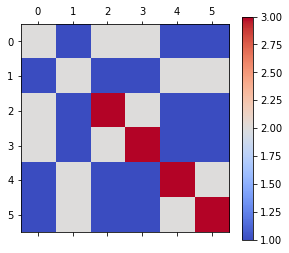

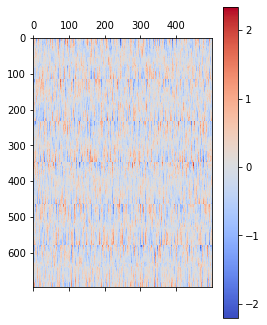

In [117]:
plt.set_cmap('coolwarm')
plt.matshow(tree1.get_data())
plt.colorbar()
plt.matshow(np.cov(tree1.get_data()))
plt.colorbar()
plt.matshow(driftL[::116])
plt.imshow(driftL[::116]@driftL[::116].T)
plt.colorbar()
plt.matshow(driftL@driftF-tree1.get_data())
plt.colorbar()
# index_shuf = list(range(tree1.get_data().shape[0]))
# # shuffle(index_shuf)
# # plt.matshow(tree1.get_data()[index_shuf])
# # plt.matshow(np.cov(tree1.get_data())[index_shuf][:,index_shuf])

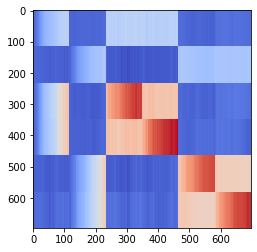

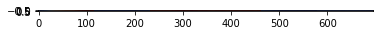

In [131]:
driftLt = la.lstsq(driftL,np.cov(tree1.get_data()))[0]
plt.imshow(driftL@driftLt)
plt.show()
plt.imshow(driftLt[::116])
plt.show()

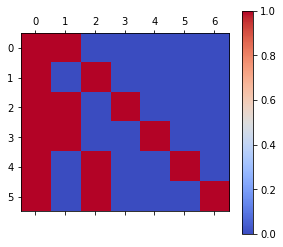

In [188]:
plt.matshow(driftL[::116])
plt.colorbar()

In [145]:
driftLt.shape

(7, 696)

In [161]:
[(k*116,(k+1)*116) for k in range(6)]

[(0, 116), (116, 232), (232, 348), (348, 464), (464, 580), (580, 696)]

In [179]:
driftLt_processed = np.array([np.mean(driftLt[:,k*116:(k+1)*116],axis=1) for k in range(6)])

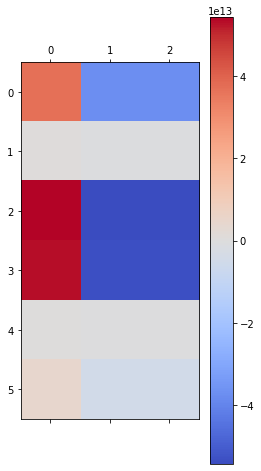

In [186]:
plt.matshow(driftLt_processed[:,:3])
plt.colorbar()

In [189]:
driftLt_processed/driftLt_processed

array([[ 3.71011417e+13, -3.71011417e+13, -3.71011417e+13,
         1.48622894e-01,  1.41610215e-01, -3.85767590e-03,
         3.09483796e-02],
       [ 7.59595891e+11, -7.59595891e+11, -7.59595891e+11,
        -2.85061423e-02, -1.78928399e-02,  1.21840161e-01,
         1.37635796e-01],
       [ 5.41953886e+13, -5.41953886e+13, -5.41953886e+13,
         7.43707550e-01,  4.06227391e-01,  2.24970282e-02,
         8.04932857e-02],
       [ 5.30929225e+13, -5.30929225e+13, -5.30929225e+13,
         4.11492871e-01,  8.50365456e-01,  2.83846783e-02,
         4.99883010e-02],
       [ 2.06500258e+11, -2.06500258e+11, -2.06500258e+11,
        -2.86783512e-03,  1.37611705e-02,  7.90398049e-01,
         4.29888893e-01],
       [ 4.38435412e+12, -4.38435412e+12, -4.38435412e+12,
         1.98296758e-02,  4.92512765e-04,  4.13992288e-01,
         8.46106190e-01]])

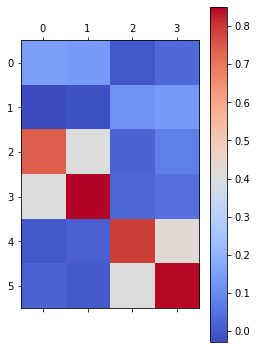

In [187]:
plt.matshow(driftLt_processed[:,3:])
plt.colorbar()

In [157]:
driftLt_processed

array([[ 1.07239931e+10,             nan,             nan,
                    nan,             nan,             nan],
       [ 4.71484663e+08,             nan,             nan,
                    nan,             nan,             nan],
       [-7.71465726e+12,             nan,             nan,
                    nan,             nan,             nan],
       [-7.78883577e+12,             nan,             nan,
                    nan,             nan,             nan],
       [-3.66793526e+11,             nan,             nan,
                    nan,             nan,             nan],
       [-4.37598984e+11,             nan,             nan,
                    nan,             nan,             nan]])

In [124]:
ssvd.ssvd(np.cov(tree1.get_data()))

KeyboardInterrupt: 